In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('fifa21_train.csv')



In [2]:
def standadize(df2):
    
    column_stand = []
    [column_stand.append(i.lower().replace(' ', '_')) for i in df2.columns]
    df2.columns = column_stand
    df2 = df2.rename(columns={'team_&_contract':'team_contract'})    
    return df2




def add (df):    
    col = ['ls', 'st', 'rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb','rcb', 'rb', 'gk']
    for col in col: 
        ml = []        
        for elem in df[col]:            
            add1 = (elem[1].strip())
            add2 = (elem[0].strip())
            ml.append(int(add1+add2))
        df[col] = ml
   
    return df



def lbs (df2):   
    ml = []    
    for elem in df2['weight']:        
        ml.append(int(elem.replace('lbs', '')))
    df2['weight'] = ml    
    return df2



def finance (df2):    
    col = ['wage', 'hits', 'release_clause', 'value']    
    for col in col:        
        ml=[]     
        for elem in df2[col]:            
            ml.append(float(elem.replace('€', '').replace('.', '').replace('M', '00000').replace('K', '000')))
        df2[col] = ml
    return df2
        

def star (df2):    
    col = ['w/f', 'sm', 'ir']    
    for col in col:         
        ml = []
        for elem in df2[col]:
            if '★' in elem:
                ml.append(float((elem.replace('★','').strip())))
            else: 
                ml.append(float(elm.strip()))                
        df2[col] = ml        
    return df2



def nan (df2):    
    col = ['club', 'position', 'joined', 'volleys', 'curve', 'agility', 'balance', 
          'balance', 'jumping', 'interceptions', 'vision', 'sliding_tackle', 'a/w', 'd/w' ]    
    for col in col:        
        df2 = df2[df2[col].isna()==False]    
    #dealing with composure:    
    composure_mean = df2['composure'].mean()
    df2['composure'] = df2['composure'].fillna(composure_mean)    
    #dealing with position    
    df2['position'] = df2['position'].fillna(df2['bp'])    
    #loan_date_end    
    df2 = df2.drop('loan_date_end', axis = 1)    
    return df2


def cleanhight(df2):    
    
    def clean_comma(x):
        if ( '"' in x ):
            x = x.replace('"','')
        return x
    
    df2['height'] = list(map(clean_comma,df2['height']))
    
    feet = df2['height'].apply(lambda x: int(x.split("'")[0]))
    inches= df2['height'].apply(lambda x: int(x.split("'")[1]))
    feet_in_cm = feet * 30.48
    inches_in_cm = inches* 2.54
    df2['height']= feet_in_cm + inches_in_cm    
    return df2





In [3]:
import pandas as pd
df = pd.read_csv('fifa21_train.csv')


def clean_dataset(df):    
    
    df2 = df.copy()
    df2 = standadize(df2)
    df2 = nan(df2)    
    df2 = finance(df2)
    df2 = add(df2)
    df2 = lbs(df2)
    df2 = star(df2)
    df2 = cleanhight(df2)
    
    return df2

df2 = clean_dataset(df)


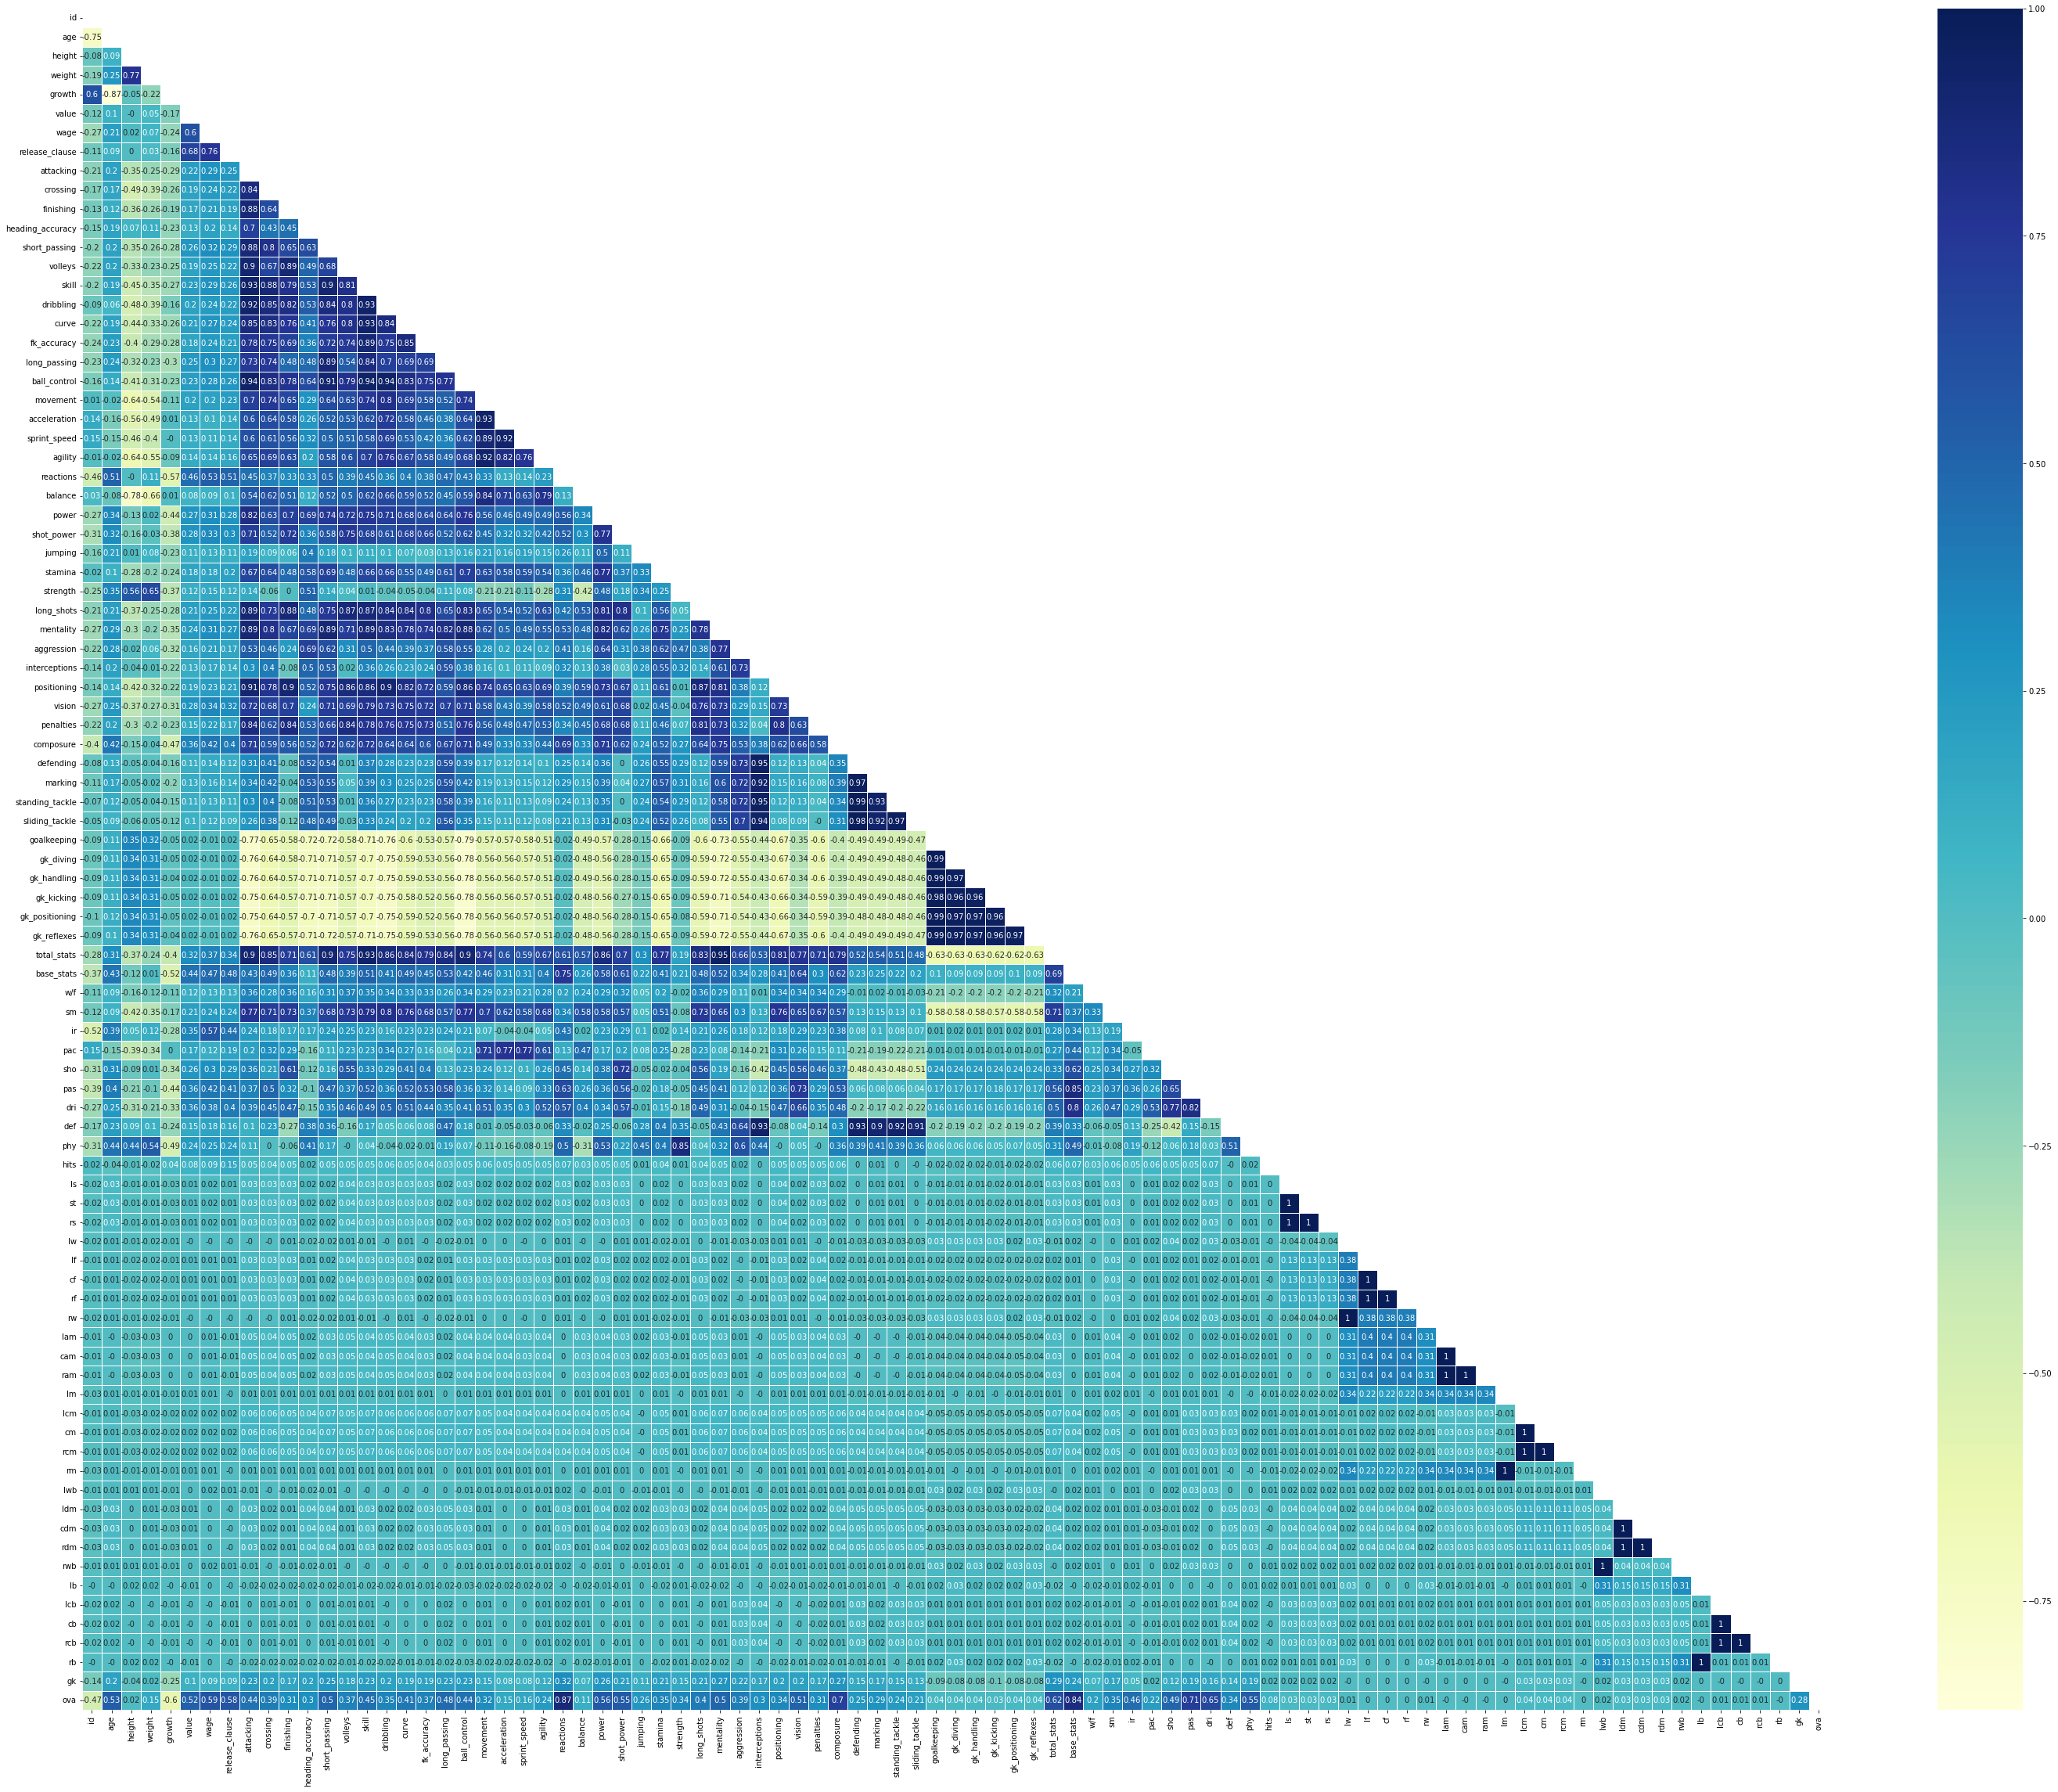

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

dfn = df2.select_dtypes(include = 'number')


corr = round(dfn.corr(),2)

mask = np.zeros_like(corr) # Return an array of zeros with the same shape and type as a given array.
mask[np.triu_indices_from(mask)] = True #returns the indeces for the upper-triangle of arr

f, ax = plt.subplots(figsize= (50,40))
ax = sns.heatmap(corr, annot=True, mask = mask, linewidths=.5, cmap='YlGnBu' )
plt.show()


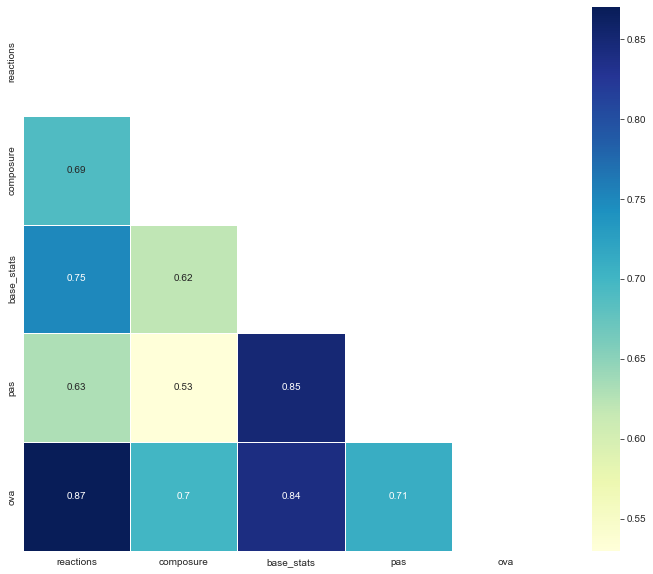

In [49]:
df_new = dfn[['reactions', 'composure', 'base_stats', 'pas','ova' ]] 
df_new

corr = round(df_new.corr(),2)

mask = np.zeros_like(corr) # Return an array of zeros with the same shape and type as a given array.
mask[np.triu_indices_from(mask)] = True #returns the indeces for the upper-triangle of arr

f, ax = plt.subplots(figsize= (12,10))
ax = sns.heatmap(corr, annot=True, mask = mask, linewidths=.5, cmap='YlGnBu' )
plt.show()


In [8]:
dflm = df_new.drop('pas', axis = 1)
dflm

,reactions,composure,base_stats,ova
0,66,54.0,357,64
1,75,70.0,412,77
2,78,82.0,404,80
3,55,48.0,329,59
4,62,58.0,360,65
...,...,...,...,...
11695,71,60.0,337,65
11696,53,46.0,347,65
11697,65,56.0,387,70
11698,62,58.0,337,67


In [96]:
# Distribution 

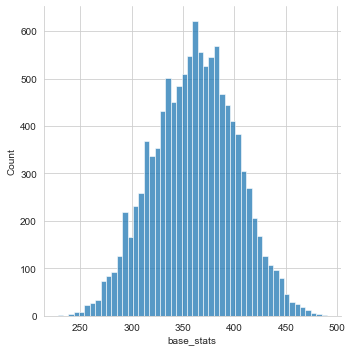

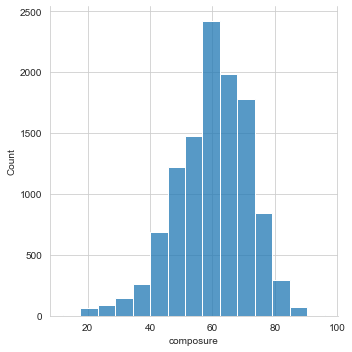

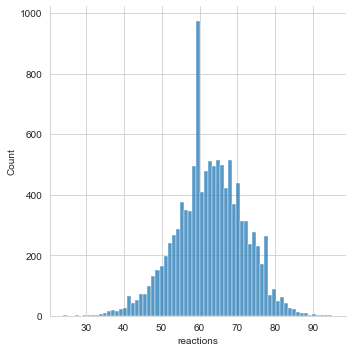

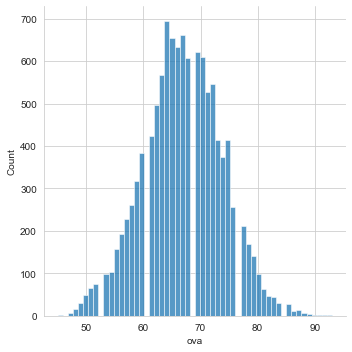

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
sns.set_style('whitegrid')

def distplot (col, bins = 20,):
        sns.distplot(df[col], kde = False, color ='red', bins = bins)
        return    


ax1 = sns.displot(dflm['base_stats'], bins = 50)
ax2 = sns.displot(dflm['composure'], bins = 15)
ax3 = sns.displot(dflm['reactions'])
ax4 = sns.displot(dflm['ova'])




In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle


###FUNCTION

# Model 1
        

X = dfn[['reactions', 'base_stats', 'composure']]
y = dfn[['ova']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

pt = PowerTransformer()
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

scaler = MinMaxScaler()
scaler.fit(X_train_pt)
X_train_pt_scaled = scaler.transform(X_train_pt)
X_test_pt_scaled = scaler.transform(X_test_pt)

model = LinearRegression()
model.fit(X_train_pt_scaled, y_train)
y_pred_train = model.predict(X_train_pt_scaled)
y_pred_test = model.predict(X_test_pt_scaled)
    
    #save the model to disk
filename = 'model_group4.sav'
pickle.dump(model, open(filename, 'wb'))

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('This is R2_Train for model 1: ', r2_train)
print('This is R2_Test for model 1: ',  r2_test)
    

This is R2_Train for model 1:  0.8528451082796566
This is R2_Test for model 1:  0.8404883117446124


In [57]:
# Model 2


X = dfn[['reactions', 'base_stats', 'pas']]
y = dfn[['ova']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

pt = PowerTransformer()
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_pt_scaled = scaler.transform(X_train_pt)
X_test_pt_scaled = scaler.transform(X_test_pt)

model = LinearRegression()
model.fit(X_train_pt_scaled, y_train)
y_pred_train = model.predict(X_train_pt_scaled)
y_pred_test = model.predict(X_test_pt_scaled)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)


print('This is R2_Train for model 2: ', r2_train)
print('This is R2_Test for model 2: ',  r2_test)


This is R2_Train for model 2:  0.8459838820087114
This is R2_Test for model 2:  0.8323641882305328


In [58]:
# Model 3



X = dfn[['reactions', 'base_stats']]
y = dfn[['ova']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

pt = PowerTransformer()
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_pt_scaled = scaler.transform(X_train_pt)
X_test_pt_scaled = scaler.transform(X_test_pt)

model = LinearRegression()
model.fit(X_train_pt_scaled, y_train)
y_pred_train = model.predict(X_train_pt_scaled)
y_pred_test = model.predict(X_test_pt_scaled)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)


print('This is R2_Train for model 3: ', r2_train)
print('This is R2_Test for model 3: ',  r2_test)

This is R2_Train for model 3:  0.8459738326774778
This is R2_Test for model 3:  0.8323308436626221


In [63]:
#Final Function -> see Function File



def linear_model(df):
    
    X = df[['reactions', 'base_stats', 'composure']]
    y = df[['ova']]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

    pt = PowerTransformer()
    pt.fit(X_train)
    X_train_pt = pt.transform(X_train)
    X_test_pt = pt.transform(X_test)

    scaler = MinMaxScaler()
    scaler.fit(X_train_pt)
    X_train_pt_scaled = scaler.transform(X_train_pt)
    X_test_pt_scaled = scaler.transform(X_test_pt)
 
    model = pickle.load(open('model_group4.sav', 'rb'))
    result = model.score(X_test_pt_scaled, y_test)
    
    print(result)
    
    return result

linear_model(dfn)

0.8404883117446124


0.8404883117446124